In [ ]:
#!/usr/bin/env python
# coding: utf-8
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

import csv

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# path = "/content/drive/MyDrive/disciplinas/top esp IA/trabalhos/planejamento_academico/Dados Regressão.csv"
path = "/content/Dados Regressão.csv"

data = pd.read_csv(path,sep=';' , header=None)

#data = data.to_numpy()[0:-1,:]
data

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,1,AUTOMACAO INDUSTRIAL,1,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,0,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,0,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,0
1,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,0,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,1,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,1,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,0
2,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,1,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,1,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,0,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,0
3,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,0,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,1,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,0,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,0
4,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,1,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,1,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,1,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,0
5,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,0,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,1,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,0,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,0
6,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,1,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,1,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,0,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,0
7,ANALISE DE SISTEMAS,0,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,0,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,0,...,SISTEMAS MICROCONTROLADOS,0,SISTEMAS OPERACIONAIS,0,TEORIA DA COMPUTACAO,0,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,1,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,1
8,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,1,ASPECTOS LEGAIS PARA COMPUTACAO,1,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,1,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,0,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,0
9,ANALISE DE SISTEMAS,1,ANALISE DE SISTEMAS,0,ASPECTOS LEGAIS PARA COMPUTACAO,0,AUTOMACAO INDUSTRIAL,0,BANCO DE DADOS I,1,...,SISTEMAS MICROCONTROLADOS,1,SISTEMAS OPERACIONAIS,1,TEORIA DA COMPUTACAO,1,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,0,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,1


In [ ]:
columns = data.iloc[:, 0::2].iloc[0].to_numpy()
print(len(columns))
columns

34


array(['ANALISE DE SISTEMAS', 'ANALISE DE SISTEMAS',
       'ASPECTOS LEGAIS PARA COMPUTACAO', 'AUTOMACAO INDUSTRIAL',
       'BANCO DE DADOS I', 'BANCO DE DADOS I', 'BANCO DE DADOS II',
       'CIRCUITOS DIGITAIS II', 'COMPILADORES', 'DESIGN DE INTERFACE',
       'ELETRONICA ANALOGICA I', 'EMPREENDEDORISMO',
       'ENGENHARIA DE SOFTWARE I', 'ENGENHARIA DE SOFTWARE II',
       'INSTRUMENTACAO ELETRONICA', 'INTELIGENCIA ARTIFICIAL',
       'INTELIGENCIA ARTIFICIAL II', 'INTERACAO HUMANO-COMPUTADOR',
       'INTRODUCAO A ROBOTICA', 'LINGUAGENS FORMAIS E AUTOMATOS',
       'MATEMATICA DISCRETA', 'PROJETO DE TRABALHO DE CONCLUSAO DE CURSO',
       'REDES DE COMPUTADORES I', 'SEGURANCA EM REDES DE COMPUTADORES',
       'SISTEMAS DISTRIBUIDOS', 'SISTEMA DE TEMPO REAL',
       'SISTEMA DE TEMPO REAL', 'SISTEMAS DE CONTROLE',
       'SISTEMAS EMBARCADOS', 'SISTEMAS MICROCONTROLADOS',
       'SISTEMAS OPERACIONAIS', 'TEORIA DA COMPUTACAO',
       'TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTE

In [ ]:
df = pd.DataFrame(data.iloc[:, 1::2].to_numpy(), columns=[columns])
df

,ANALISE DE SISTEMAS,ANALISE DE SISTEMAS,ASPECTOS LEGAIS PARA COMPUTACAO,AUTOMACAO INDUSTRIAL,BANCO DE DADOS I,BANCO DE DADOS I,BANCO DE DADOS II,CIRCUITOS DIGITAIS II,COMPILADORES,DESIGN DE INTERFACE,...,SISTEMAS DISTRIBUIDOS,SISTEMA DE TEMPO REAL,SISTEMA DE TEMPO REAL,SISTEMAS DE CONTROLE,SISTEMAS EMBARCADOS,SISTEMAS MICROCONTROLADOS,SISTEMAS OPERACIONAIS,TEORIA DA COMPUTACAO,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL
0,1,0,1,1,1,1,0,0,1,0,...,0,1,1,1,1,0,1,1,0,0
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,1,1,1,0
2,1,0,1,0,1,0,0,0,1,1,...,0,1,0,1,1,1,1,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,1,1,0,0
4,1,0,1,0,1,0,0,1,1,0,...,1,1,0,0,1,1,1,1,1,0
5,1,0,0,0,1,0,0,0,1,0,...,1,1,0,1,1,1,1,1,0,0
6,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
8,1,1,1,0,1,0,1,0,1,0,...,0,1,0,1,1,1,1,1,0,0
9,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1


In [ ]:
df = df.loc[:,~df.columns.duplicated()]
df

,ANALISE DE SISTEMAS,ASPECTOS LEGAIS PARA COMPUTACAO,AUTOMACAO INDUSTRIAL,BANCO DE DADOS I,BANCO DE DADOS II,CIRCUITOS DIGITAIS II,COMPILADORES,DESIGN DE INTERFACE,ELETRONICA ANALOGICA I,EMPREENDEDORISMO,...,SEGURANCA EM REDES DE COMPUTADORES,SISTEMAS DISTRIBUIDOS,SISTEMA DE TEMPO REAL,SISTEMAS DE CONTROLE,SISTEMAS EMBARCADOS,SISTEMAS MICROCONTROLADOS,SISTEMAS OPERACIONAIS,TEORIA DA COMPUTACAO,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL
0,1,1,1,1,0,0,1,0,1,1,...,0,0,1,1,1,0,1,1,0,0
1,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,1,1,1,0
2,1,1,0,1,0,0,1,1,0,1,...,0,0,1,1,1,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,...,1,1,0,1,0,1,1,1,0,0
4,1,1,0,1,0,1,1,0,1,1,...,0,1,1,0,1,1,1,1,1,0
5,1,0,0,1,0,0,1,0,1,1,...,1,1,1,1,1,1,1,1,0,0
6,1,1,0,1,0,0,1,0,1,1,...,0,0,1,1,1,1,1,1,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
8,1,1,0,1,1,0,1,0,1,1,...,0,0,1,1,1,1,1,1,0,0
9,1,0,0,1,0,0,1,0,1,1,...,0,0,1,1,1,1,1,1,0,1


In [ ]:
semestres = ['2020.1', '2020.2', '2021.1' , '2021.2', '2022.1', '2022.2', '2023.1', '2023.2', '2024.1', '2024.2']

df['semestre'] = semestres

df

,ANALISE DE SISTEMAS,ASPECTOS LEGAIS PARA COMPUTACAO,AUTOMACAO INDUSTRIAL,BANCO DE DADOS I,BANCO DE DADOS II,CIRCUITOS DIGITAIS II,COMPILADORES,DESIGN DE INTERFACE,ELETRONICA ANALOGICA I,EMPREENDEDORISMO,...,SISTEMAS DISTRIBUIDOS,SISTEMA DE TEMPO REAL,SISTEMAS DE CONTROLE,SISTEMAS EMBARCADOS,SISTEMAS MICROCONTROLADOS,SISTEMAS OPERACIONAIS,TEORIA DA COMPUTACAO,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,semestre
0,1,1,1,1,0,0,1,0,1,1,...,0,1,1,1,0,1,1,0,0,2020.1
1,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,1,1,1,1,0,2020.2
2,1,1,0,1,0,0,1,1,0,1,...,0,1,1,1,1,1,1,0,0,2021.1
3,1,0,0,1,0,0,1,0,1,1,...,1,0,1,0,1,1,1,0,0,2021.2
4,1,1,0,1,0,1,1,0,1,1,...,1,1,0,1,1,1,1,1,0,2022.1
5,1,0,0,1,0,0,1,0,1,1,...,1,1,1,1,1,1,1,0,0,2022.2
6,1,1,0,1,0,0,1,0,1,1,...,0,1,1,1,1,1,1,0,0,2023.1
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,2023.2
8,1,1,0,1,1,0,1,0,1,1,...,0,1,1,1,1,1,1,0,0,2024.1
9,1,0,0,1,0,0,1,0,1,1,...,0,1,1,1,1,1,1,0,1,2024.2


In [ ]:
anos = []
semestres = []

for i in range(0, len(df)):

  ano_semestre = df.iloc[i,-1].split(".")

  ano = ano_semestre[0]
  semestre = ano_semestre[1]

  anos.append(ano)
  semestres.append(semestre)

df['semestre'] = semestres
df['ano'] = anos


In [ ]:
df

,ANALISE DE SISTEMAS,ASPECTOS LEGAIS PARA COMPUTACAO,AUTOMACAO INDUSTRIAL,BANCO DE DADOS I,BANCO DE DADOS II,CIRCUITOS DIGITAIS II,COMPILADORES,DESIGN DE INTERFACE,ELETRONICA ANALOGICA I,EMPREENDEDORISMO,...,SISTEMA DE TEMPO REAL,SISTEMAS DE CONTROLE,SISTEMAS EMBARCADOS,SISTEMAS MICROCONTROLADOS,SISTEMAS OPERACIONAIS,TEORIA DA COMPUTACAO,TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS,TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL,semestre,ano
0,1,1,1,1,0,0,1,0,1,1,...,1,1,1,0,1,1,0,0,1,2020
1,1,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,1,1,0,2,2020
2,1,1,0,1,0,0,1,1,0,1,...,1,1,1,1,1,1,0,0,1,2021
3,1,0,0,1,0,0,1,0,1,1,...,0,1,0,1,1,1,0,0,2,2021
4,1,1,0,1,0,1,1,0,1,1,...,1,0,1,1,1,1,1,0,1,2022
5,1,0,0,1,0,0,1,0,1,1,...,1,1,1,1,1,1,0,0,2,2022
6,1,1,0,1,0,0,1,0,1,1,...,1,1,1,1,1,1,0,0,1,2023
7,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2,2023
8,1,1,0,1,1,0,1,0,1,1,...,1,1,1,1,1,1,0,0,1,2024
9,1,0,0,1,0,0,1,0,1,1,...,1,1,1,1,1,1,0,1,2,2024


In [ ]:
data = df

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [ ]:
columns = np.unique(columns)
print(len(columns))
columns

31


array(['ANALISE DE SISTEMAS', 'ASPECTOS LEGAIS PARA COMPUTACAO',
       'AUTOMACAO INDUSTRIAL', 'BANCO DE DADOS I', 'BANCO DE DADOS II',
       'CIRCUITOS DIGITAIS II', 'COMPILADORES', 'DESIGN DE INTERFACE',
       'ELETRONICA ANALOGICA I', 'EMPREENDEDORISMO',
       'ENGENHARIA DE SOFTWARE I', 'ENGENHARIA DE SOFTWARE II',
       'INSTRUMENTACAO ELETRONICA', 'INTELIGENCIA ARTIFICIAL',
       'INTELIGENCIA ARTIFICIAL II', 'INTERACAO HUMANO-COMPUTADOR',
       'INTRODUCAO A ROBOTICA', 'LINGUAGENS FORMAIS E AUTOMATOS',
       'MATEMATICA DISCRETA', 'PROJETO DE TRABALHO DE CONCLUSAO DE CURSO',
       'REDES DE COMPUTADORES I', 'SEGURANCA EM REDES DE COMPUTADORES',
       'SISTEMA DE TEMPO REAL', 'SISTEMAS DE CONTROLE',
       'SISTEMAS DISTRIBUIDOS', 'SISTEMAS EMBARCADOS',
       'SISTEMAS MICROCONTROLADOS', 'SISTEMAS OPERACIONAIS',
       'TEORIA DA COMPUTACAO',
       'TOPICOS ESPECIAIS EM DESENVOLVIMENTO DE SISTEMAS',
       'TOPICOS ESPECIAIS EM INTELIGENCIA ARTIFICIAL'], dtype=object)

In [ ]:
df

array([[1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.25],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.25],
       [1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 1.  , 0.

# Discretizacao

In [ ]:
def preprocessamento(data, columns):
  df = pd.DataFrame()
  datas_x, datas_y = [], []
  d = data

    # Iterar por cada linha no array
  for i in range(0, len(d)-1):
      data_x = d[i,0:-2]
      data_y = d[i+1,0:-2]

      datas_x.append(data_x)
      datas_y.append(data_y)

  datas_x = np.transpose(datas_x)
  datas_y = np.transpose(datas_y)

  i = 0
  for col in columns:
    df[col] = datas_x[i]
    i = i + 1

  #adicionar semetsre e periodo
  df["semestre"] = data[:-1, -2]
  df["ano"] = data[:-1, -1]

  i = 0
  for col in columns:
    df[i] = datas_y[i]
    i = i + 1

  return df

In [ ]:
df

array([[1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.25],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.25],
       [1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 1.  , 0.

In [ ]:
df_transform = preprocessamento(df, columns)
df_transform

,ANALISE DE SISTEMAS,ASPECTOS LEGAIS PARA COMPUTACAO,AUTOMACAO INDUSTRIAL,BANCO DE DADOS I,BANCO DE DADOS II,CIRCUITOS DIGITAIS II,COMPILADORES,DESIGN DE INTERFACE,ELETRONICA ANALOGICA I,EMPREENDEDORISMO,...,21,22,23,24,25,26,27,28,29,30
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
8,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [ ]:
df_transform.to_numpy()

array([[1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  

In [ ]:
print(df_transform.dtypes)

ANALISE DE SISTEMAS                float64
ASPECTOS LEGAIS PARA COMPUTACAO    float64
AUTOMACAO INDUSTRIAL               float64
BANCO DE DADOS I                   float64
BANCO DE DADOS II                  float64
                                    ...   
26                                 float64
27                                 float64
28                                 float64
29                                 float64
30                                 float64
Length: 64, dtype: object


In [ ]:
X = df_transform.to_numpy()[:,:33]
X

array([[1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.25],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.25],
       [1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 1.  , 0.

In [ ]:
y = df_transform.to_numpy()[:,33:]
y

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
        1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.],
       [1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [1., 1

In [ ]:
timestemp = df_transform.to_numpy()
timestemp

array([[1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


# X = df[:,:33]
# y = df[:,33:]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0, shuffle=False)

# scaler = MinMaxScaler(feature_range=(0, 1))
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)


In [ ]:

model = Sequential()

model.add(Dense(64, input_shape=(33,), activation='relu'))
model.add(Dense(32, activation="relu"))
model.add(Dense(31, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mse'])

batch_size = 16
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2576 - mean_absolute_error: 0.5030 - mse: 0.2576 - val_loss: 0.2487 - val_mean_absolute_error: 0.4958 - val_mse: 0.2487
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2518 - mean_absolute_error: 0.4971 - mse: 0.2518 - val_loss: 0.2493 - val_mean_absolute_error: 0.4960 - val_mse: 0.2493
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2465 - mean_absolute_error: 0.4915 - mse: 0.2465 - val_loss: 0.2499 - val_mean_absolute_error: 0.4963 - val_mse: 0.2499
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.2416 - mean_absolute_error: 0.4862 - mse: 0.2416 - val_loss: 0.2505 - val_mean_absolute_error: 0.4965 - val_mse: 0.2505
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2375 - mean_absolute_error: 0.4815 - mse: 0.2375 - val_loss: 0.2510 - val_mean_absolute_error: 0.4965 - val_mse: 0.2510
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2336 - mean_absolute_error: 0.4769 - mse:

In [ ]:
x_test

array([[1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        1.]])

In [ ]:
y_test

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.]])

In [ ]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
np.round(y_pred)

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.]],
      dtype=float32)

In [ ]:
auxDT=[]
for a in y_test[0]:
    a1=[]
    a1.append(float(a))
    auxDT.append(a1[0])

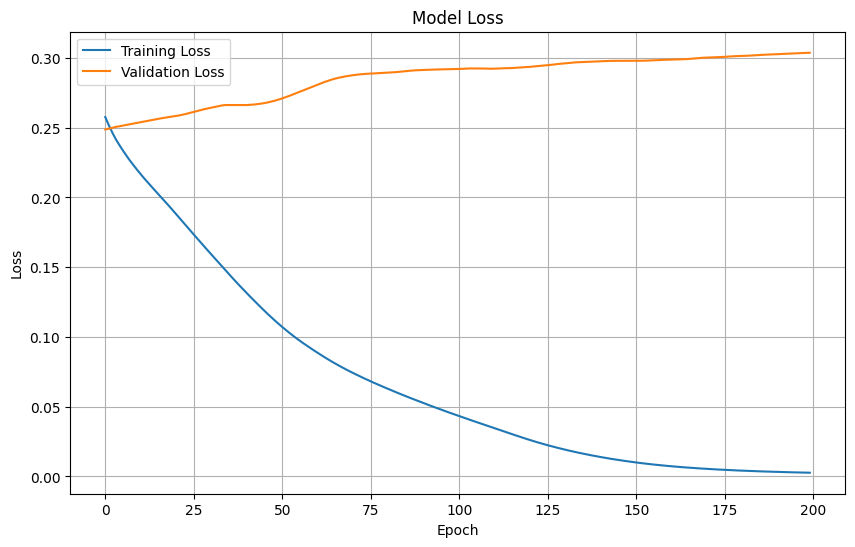

In [ ]:
# prompt: grafico de loss

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

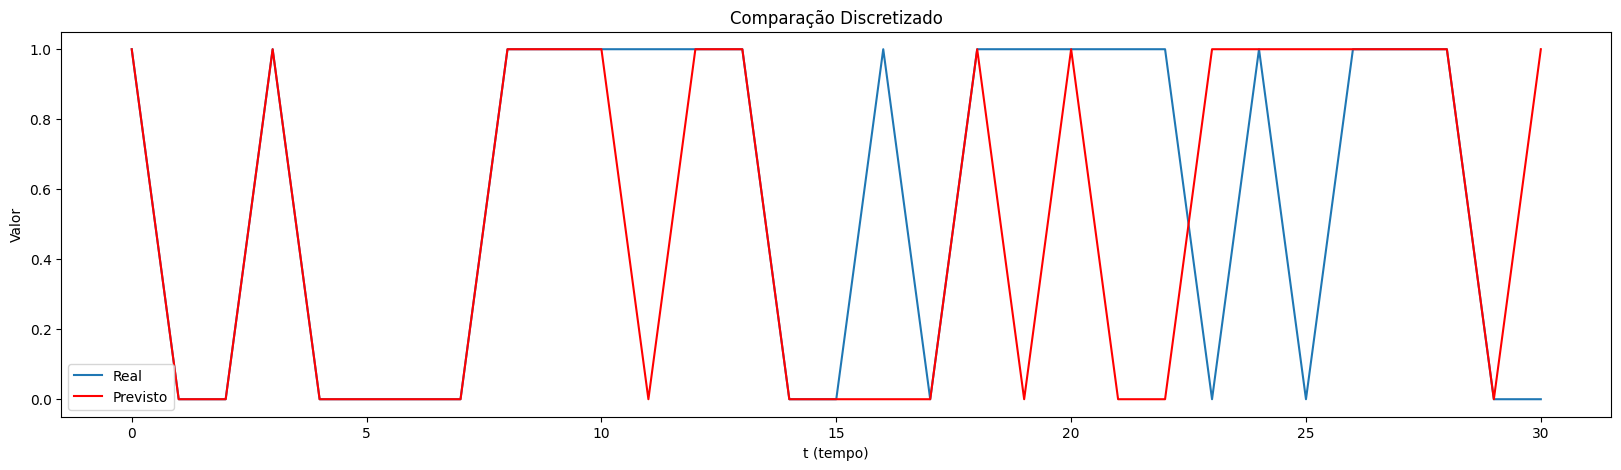

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(np.round(y_pred)[0], label="Real")
plt.plot(y_test[0], color='red', label = 'Previsto')
plt.title('Comparação Discretizado')
plt.legend()
plt.xlabel("t (tempo)")
plt.ylabel('Valor')
plt.show()

# Trigonometrica

In [ ]:
def discretizacao_trig(data, columns, df_old):
  df = pd.DataFrame()
  datas_x, datas_y = [], []
  d = data

  for i in range(0, len(d)-1):
      data_x = d[i,0:-2]
      data_y = d[i+1,0:-2]

      datas_x.append(data_x)
      datas_y.append(data_y)

  datas_x = np.transpose(datas_x)
  datas_y = np.transpose(datas_y)

  i = 0
  for col in columns:
    df[col] = datas_x[i]
    i = i + 1

  S = []
  A = []
  for i in range(len(d) - 1):
    semestre = int(df_old['semestre'].values[i][0])
    ano = int(df_old['ano'].values[i][0])

    S.append(np.sin(semestre))
    A.append(np.sin(ano))

  df['semestre'] = S
  df['ano'] = A

  i = 0
  for col in columns:
    df[i] = datas_y[i]
    i = i + 1

  return df

In [ ]:
df_trig = discretizacao_trig(df, columns, data)
df_trig

,ANALISE DE SISTEMAS,ASPECTOS LEGAIS PARA COMPUTACAO,AUTOMACAO INDUSTRIAL,BANCO DE DADOS I,BANCO DE DADOS II,CIRCUITOS DIGITAIS II,COMPILADORES,DESIGN DE INTERFACE,ELETRONICA ANALOGICA I,EMPREENDEDORISMO,...,21,22,23,24,25,26,27,28,29,30
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
8,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [ ]:
print(data.shape)

(10, 33)


In [ ]:
df_trig["ano"] = df_trig["ano"].astype('float')
df_trig["semestre"] = df_trig["semestre"].astype('float')

print(df_trig.dtypes)

X, y = df_trig.iloc[:, :33], df_trig.iloc[:,33:]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

model = Sequential()

model.add(Dense(36, input_shape=(33,), activation='relu'))
model.add(Dense(18, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(31, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mse'])

batch_size = 2
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

ANALISE DE SISTEMAS                float64
ASPECTOS LEGAIS PARA COMPUTACAO    float64
AUTOMACAO INDUSTRIAL               float64
BANCO DE DADOS I                   float64
BANCO DE DADOS II                  float64
                                    ...   
26                                 float64
27                                 float64
28                                 float64
29                                 float64
30                                 float64
Length: 64, dtype: object
Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.2482 - mean_absolute_error: 0.4964 - mse: 0.2482 - val_loss: 0.2569 - val_mean_absolute_error: 0.5057 - val_mse: 0.2569
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2474 - mean_absolute_error: 0.4959 - mse: 0.2474 - val_loss: 0.2569 - val_mean_absolute_error: 0.5058 - val_mse: 0.2569
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2472 - mean_absolute_error: 0.4959 - mse: 0.2472 - val_loss: 0.2570 - val_mean_ab

In [ ]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [ ]:
np.array(y_test)[0]

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.])

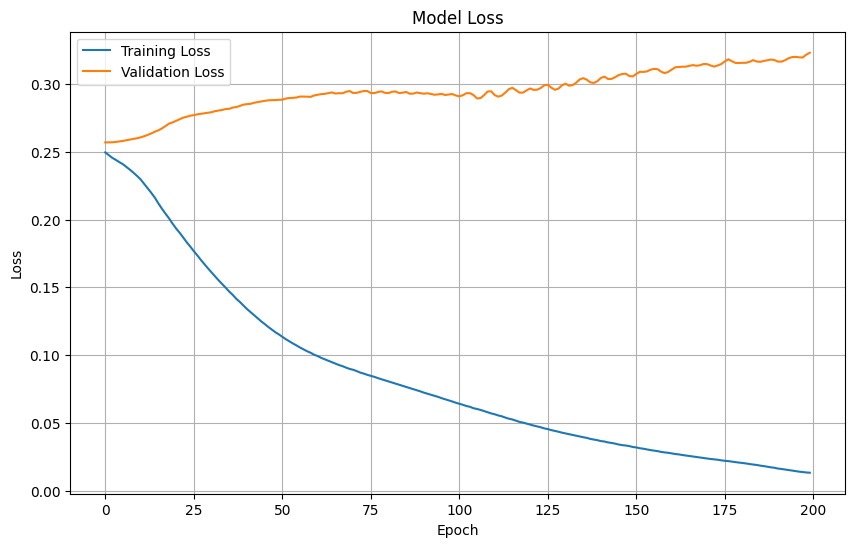

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

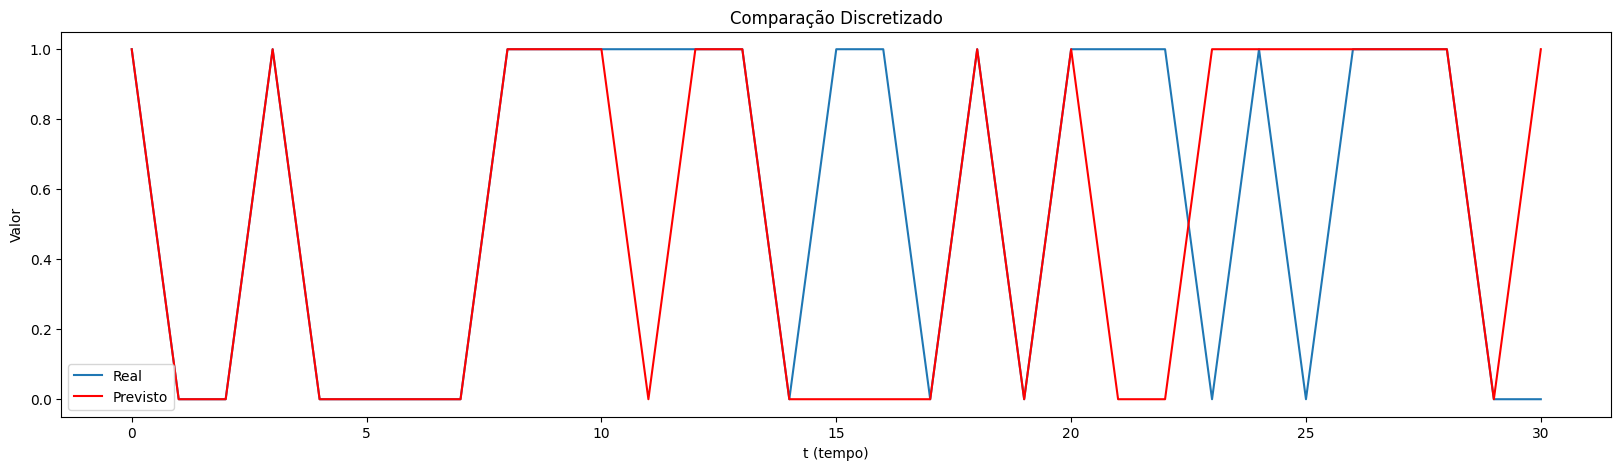

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(np.round(y_pred)[0], label="Real")
plt.plot(np.array(y_test)[0], color='red', label = 'Previsto')
plt.title('Comparação Discretizado')
plt.legend()
plt.xlabel("t (tempo)")
plt.ylabel('Valor')
plt.show()

In [ ]:
auxDT=[]
for a in y_test:
    a1=[]
    a1.append(float(a))
    auxDT.append(a1)

In [ ]:
df

array([[1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.25],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.25],
       [1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 1.  , 1.  , 1.  , 0.

In [ ]:
len(df[3,-31:])

33

In [ ]:
def janelamento(data, janela):
  dataset = []
  tamanho_x = data.shape[0] - 1

  t=0
  while(t<tamanho_x - janela):
    y = 0
    row = []
    while(y < janela):
      if(y+t < tamanho_x):
        for x in data[y+t,:-2]:
          row.append(x)
      else:
        break
      y = y + 1

    for x in data[y+t,:-2]:
      row.append(x)

    dataset.append(row)

    t = t + 1


  dataset = pd.DataFrame(dataset)


  return pd.DataFrame(dataset)

In [ ]:
df_janela = janelamento(df, 4)
df_janela

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
print(df_janela.dtypes)

X, y = df_janela.iloc[:, :-31], df_janela.iloc[:, -31:]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

model = Sequential()

model.add(Dense(36, input_shape=(len(df_janela.columns) - 31,), activation='relu'))
model.add(Dense(18, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(31, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mse'])

batch_size = 16
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
150    float64
151    float64
152    float64
153    float64
154    float64
Length: 155, dtype: object
Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2518 - mean_absolute_error: 0.5015 - mse: 0.2518 - val_loss: 0.2520 - val_mean_absolute_error: 0.5019 - val_mse: 0.2520
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2505 - mean_absolute_error: 0.5001 - mse: 0.2505 - val_loss: 0.2520 - val_mean_absolute_error: 0.5019 - val_mse: 0.2520
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.2494 - mean_absolute_error: 0.4991 - mse: 0.2494 - val_loss: 0.2520 - val_mean_absolute_error: 0.5020 - val_mse: 0.2520
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2487 - mean_absolute_error: 0.4984 - mse: 0.2487 - val_loss: 0.2521 - val_mean_absolute_error: 0.5020 - val_mse: 0.2521
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2483 - mean_absolute_error: 0

In [ ]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [ ]:
y_test

,124,125,126,127,128,129,130,131,132,133,...,145,146,147,148,149,150,151,152,153,154
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
np.round(y_pred)

array([[1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.]],
      dtype=float32)

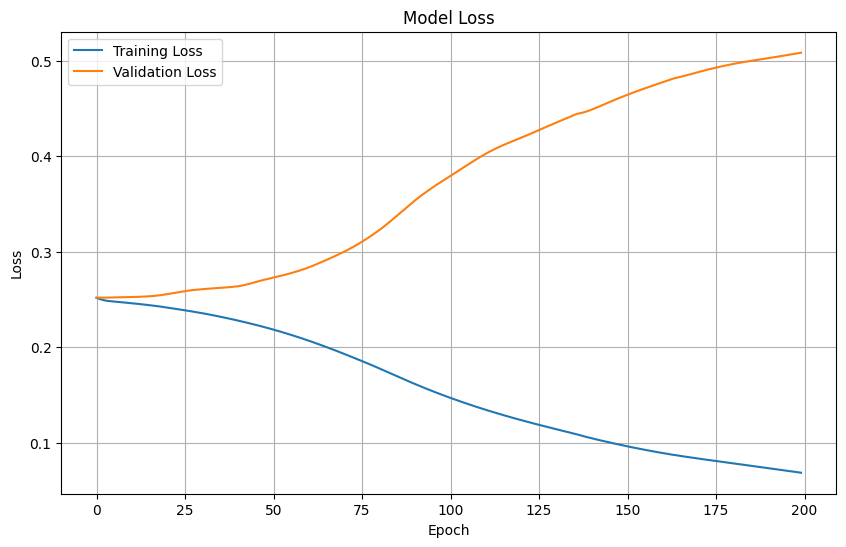

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

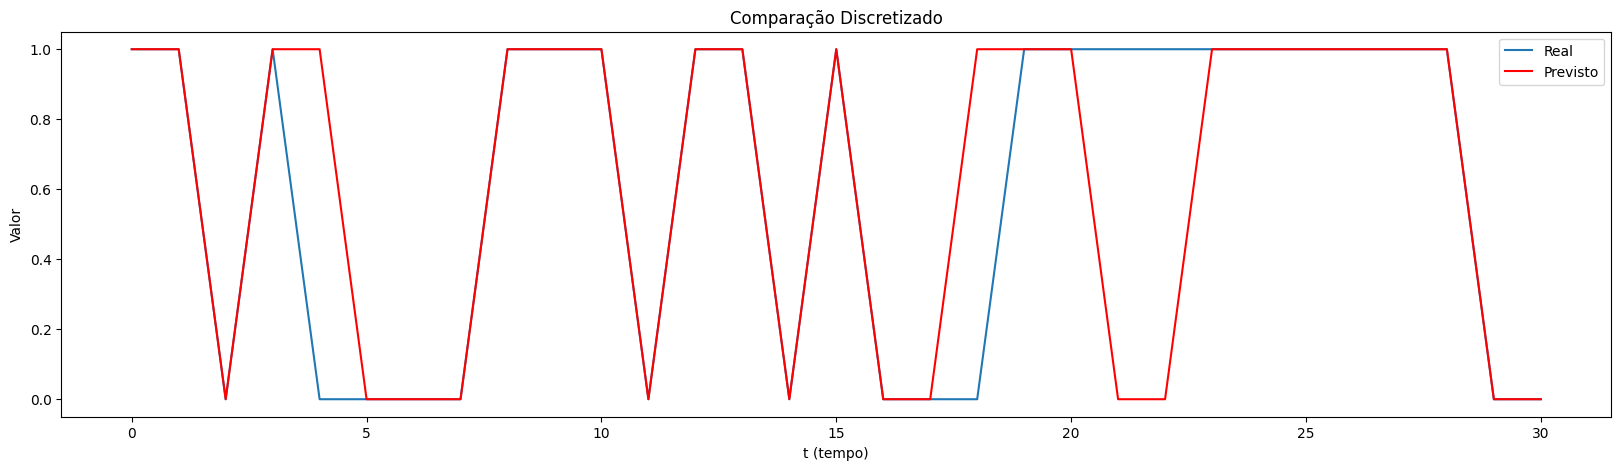

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(np.round(y_pred)[0], label="Real")
plt.plot(np.array(y_test)[0], color='red', label = 'Previsto')
plt.title('Comparação Discretizado')
plt.legend()
plt.xlabel("t (tempo)")
plt.ylabel('Valor')
plt.show()